Diabetes Prediction Model Preparation

In [3]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# For statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
#counting for NULL values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data Visualization of Diabetes Prediction

In [10]:
import seaborn as sns

<Axes: xlabel='Outcome', ylabel='count'>

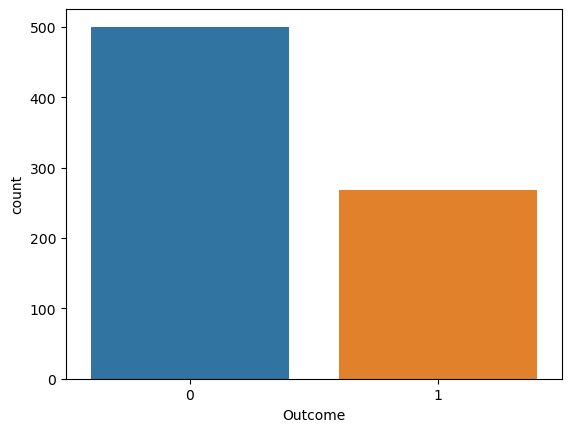

In [11]:
sns.countplot(x = 'Outcome', data = df)

In [12]:
import itertools
import matplotlib.pyplot as plt

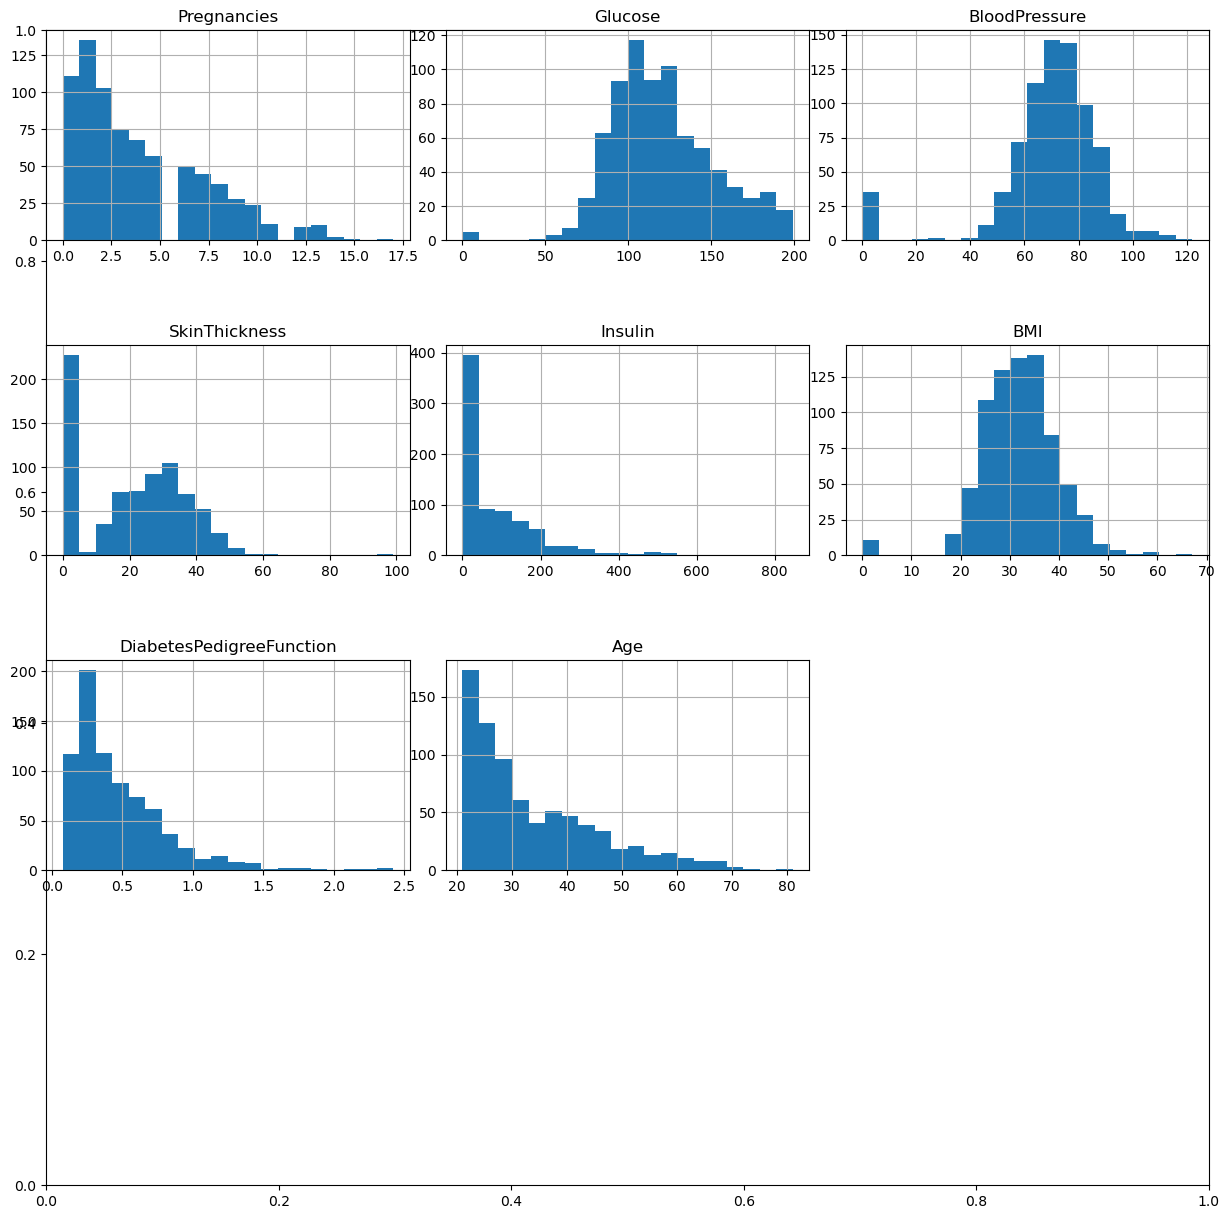

In [13]:
col = df.columns[:8]
plt.subplots(figsize = (15,15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length + 1)//2 , 3, j+1)
    plt.subplots_adjust(wspace = 0.1, hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

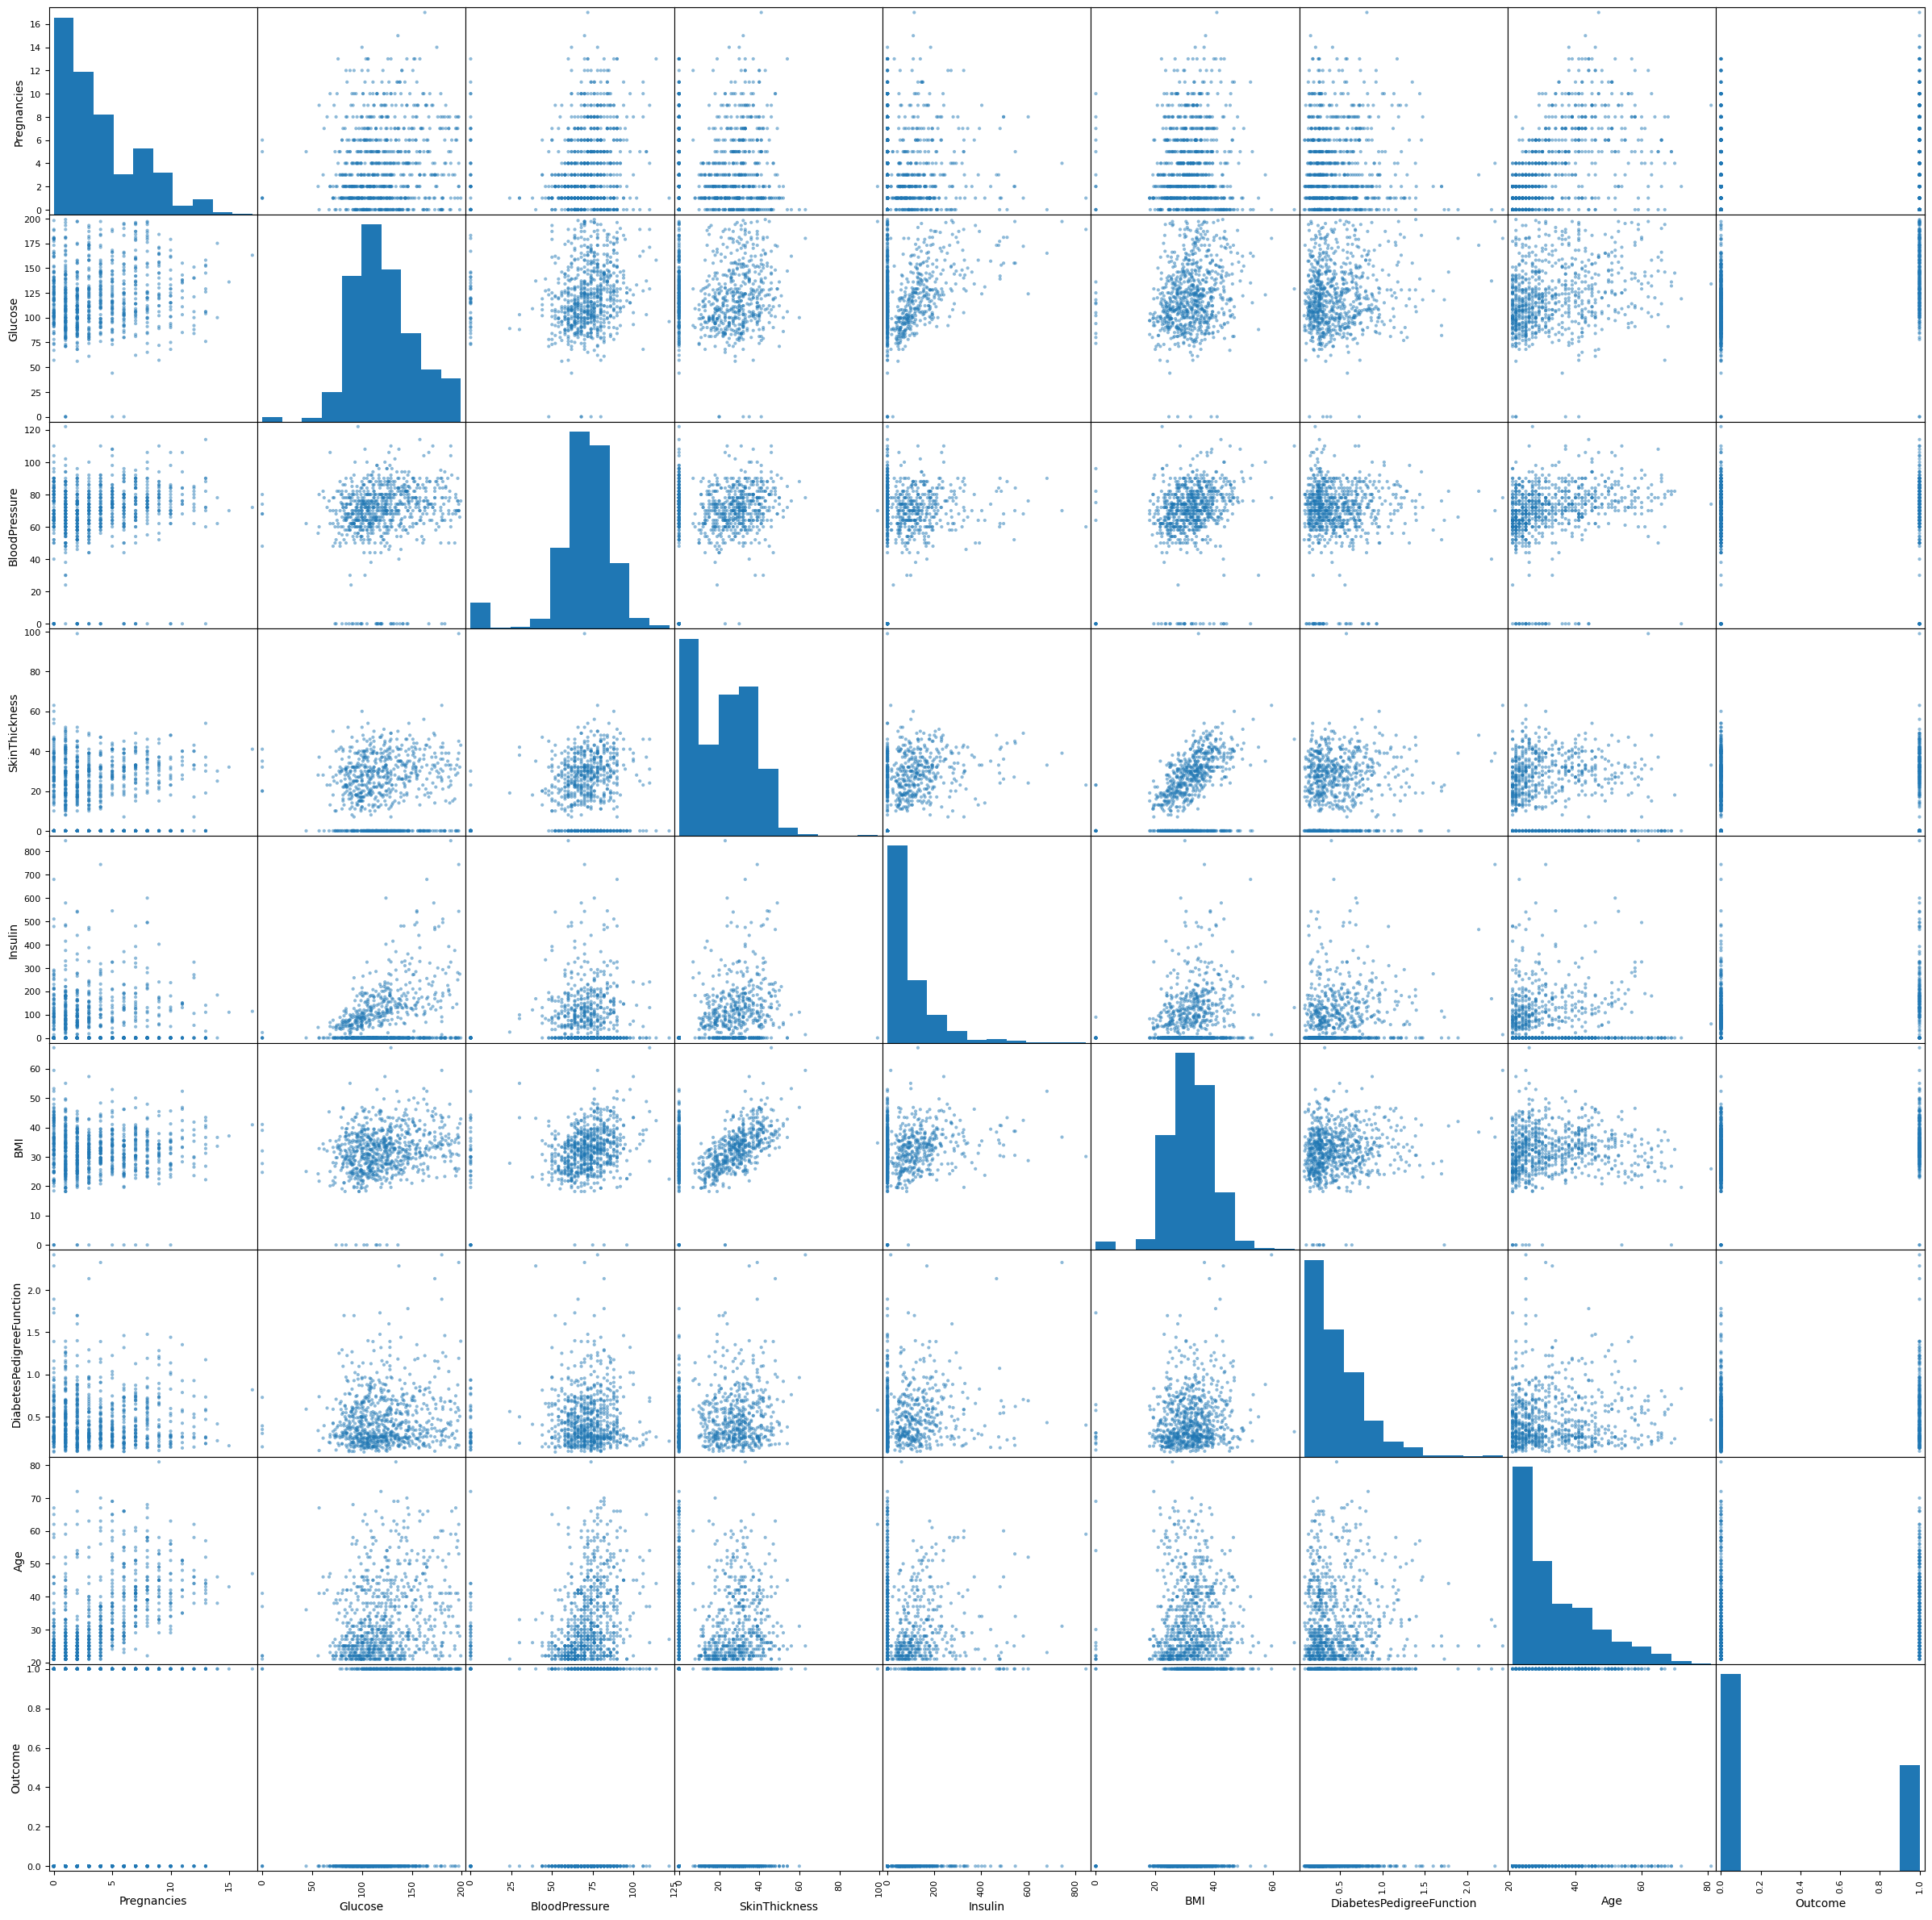

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (30, 30))

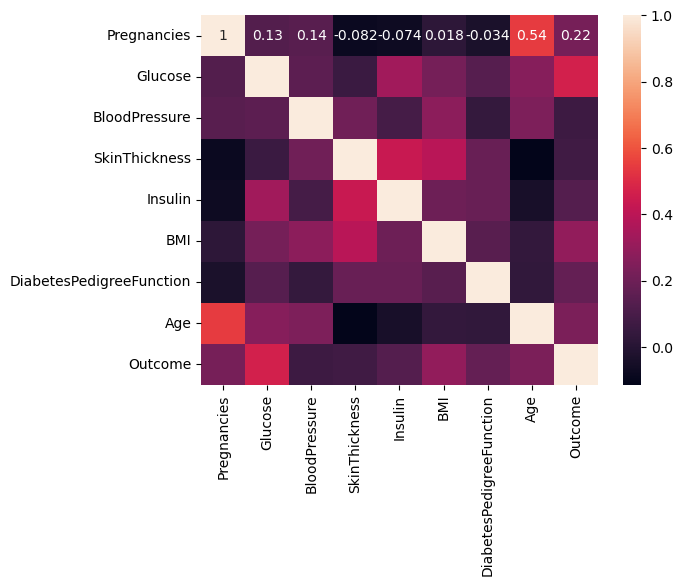

In [16]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'Outcome', axis = 1)
Y = df['Outcome']

In [19]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42, stratify = df['Outcome'])

In [21]:
trainval = (1.0 * len(X_train)) / (1.0 * len(df.index))
testval = (1.0 * len(X_test)) / (1.0 * len(df.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

69.92% in training set
30.08% in test set


In [22]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 1]), (len(df.loc[df['Outcome'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 0]), (len(df.loc[df['Outcome'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 187 (34.82%)
Training False : 350 (65.18%)

Test True      : 81 (35.06%)
Test False     : 150 (64.94%)


In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [25]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.transform(X_test)


Naive Bayes

In [26]:
import pickle

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train.ravel())




GaussianNB()

In [28]:
from sklearn import metrics

prediction_from_trained_data = nb_model.predict(X_train)
accuracy = metrics.accuracy_score(Y_train, prediction_from_trained_data)

print ("Accuracy of naive bayes model is on training : {0:.4f}".format(accuracy))

Accuracy of naive bayes model is on training : 0.7579


In [29]:
prediction_from_test_data = nb_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, prediction_from_test_data)

print ("Accuracy of naive bayes model is on testing : {0:0.4f}".format(accuracy))

Accuracy of naive bayes model is on testing : 0.7273


In [30]:

with open('nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)
print("Naive Bayes model saved.")

Naive Bayes model saved.


In [31]:
print ("Confusion Matrix")

print ("{0}".format(metrics.confusion_matrix(Y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 48  33]
 [ 30 120]]


In [32]:
print ("Classification Report")

print ("{0}".format(metrics.classification_report(Y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.59      0.60        81
           0       0.78      0.80      0.79       150

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

rf_predict_test = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, rf_predict_test)
print("Accuracy: {0:.4f}".format(accuracy))

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(Y_test, rf_predict_test))

print("Classification Report:")
print(classification_report(Y_test, rf_predict_test))



Accuracy: 0.7532
Confusion Matrix for Random Forest:
[[128  22]
 [ 35  46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.68      0.57      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [34]:

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("Random forest model saved.")

Random forest model saved.


Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, max_iter=10000)
lr_model.fit(X_train, Y_train.to_numpy())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy : {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test)))
print("Confusion Matrix")
print(metrics.confusion_matrix(Y_test, lr_predict_test, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(Y_test, lr_predict_test, labels=[1, 0]))


Accuracy : 0.7316
Confusion Matrix
[[ 42  39]
 [ 23 127]]

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.52      0.58        81
           0       0.77      0.85      0.80       150

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



In [36]:

with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
print("Logistic Regression model saved.")

Logistic Regression model saved.


Logistic Regression With built in cross-validation 

In [37]:
from sklearn.linear_model import LogisticRegressionCV

lr_modelCV = LogisticRegression(C = 0.7, random_state=42, max_iter=1000000000)
lr_modelCV.fit(X_train, Y_train.to_numpy())


lr_predict_test_CV = lr_modelCV.predict(X_test)
print("Accuracy : {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test_CV)))

print("confusion_matrix")
print(metrics.confusion_matrix(Y_test, lr_predict_test_CV, labels = [1,0]))

print(" ")
print("classification Report")
print(metrics.classification_report(Y_test, lr_predict_test_CV, labels=[1,0]))

Accuracy : 0.7316
confusion_matrix
[[ 42  39]
 [ 23 127]]
 
classification Report
              precision    recall  f1-score   support

           1       0.65      0.52      0.58        81
           0       0.77      0.85      0.80       150

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



Support Vector Machine (SVM)

In [38]:
from sklearn import svm

svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train, Y_train)

#Making prediction of SVM
X_train_prediction = svm_model.predict(X_train)

accuracy = metrics.accuracy_score(X_train_prediction,Y_train )

print("Accuracy of SVM model with training :{0:.4f}".format(accuracy))

#Making prediction of SVM
X_test_prediction = svm_model.predict(X_test)

accuracy = accuracy_score(X_test_prediction, Y_test )

print("Accuracy of SVM model with test is :{0:.4f}".format(accuracy))



Accuracy of SVM model with training :0.7933
Accuracy of SVM model with test is :0.7316


In [39]:

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
print("SVM model saved.")

SVM model saved.


In [40]:
import matplotlib.pyplot as plt
from sklearn import metrics

print("Confusion Matrix for Support Vector Machine:")

# labels for set 1=True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(Y_test, X_test_prediction, labels=[1, 0])))

print("")

print("Classification Report:")

# labels for set 1=True to upper left and 0 = False to lower right
print("{0}".format(metrics.classification_report(Y_test, X_test_prediction, labels=[1, 0])))


Confusion Matrix for Support Vector Machine:
[[ 39  42]
 [ 20 130]]

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.48      0.56        81
           0       0.76      0.87      0.81       150

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231





ANN

In [41]:
from sklearn.neural_network import MLPClassifier

ann_model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=1000, random_state=42)

ann_model.fit(X_train, Y_train.to_numpy())


MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=1000, random_state=42)

In [42]:
prediction_from_trained_data = ann_model.predict(X_train)

accuracy = accuracy_score(Y_train, prediction_from_trained_data)
print ("Training Accuracy of our ANN model is : {0:.4f}".format(accuracy))

Training Accuracy of our ANN model is : 0.8268


In [43]:
ann_predict_test = ann_model.predict(X_test)

ann_accuracy_testdata = metrics.accuracy_score(Y_test, ann_predict_test)

print ("Test Accuracy: {0:.4f}".format(ann_accuracy_testdata))

Test Accuracy: 0.7100


In [44]:
with open('ann_model.pkl', 'wb') as f:
    pickle.dump(ann_model, f)
print("ANN model saved.")

ANN model saved.


In [45]:
print("Confusion Matrix for ANN")
print("{0}".format(metrics.confusion_matrix(Y_test, ann_predict_test, labels = [1,0])))
print(' ')
print("Classification Report: ")
print("{0}".format(metrics.classification_report(Y_test, ann_predict_test)))

Confusion Matrix for ANN
[[ 43  38]
 [ 29 121]]
 
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       150
           1       0.60      0.53      0.56        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



Decision Tree
    

In [46]:

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train.to_numpy())

prediction_from_trained_data = dt_model.predict(X_train)
accuracy = metrics.accuracy_score(Y_train, prediction_from_trained_data)

print ("Training Accuracy of our DT model is : {0:.4f}".format(accuracy))

Training Accuracy of our DT model is : 1.0000


In [47]:
dt_predict_test = dt_model.predict(X_test)

dt_accuracy_testdata = metrics.accuracy_score(Y_test, dt_predict_test)

print ("Accuracy of DT with test : {0:.4f}".format(dt_accuracy_testdata))

print("Confusion Matrix for DT")
print("{0}".format(metrics.confusion_matrix(Y_test, dt_predict_test, labels = [1,0])))
print(' ')
print("Classification Report: ")
print("{0}".format(metrics.classification_report(Y_test, dt_predict_test)))

Accuracy of DT with test : 0.6970
Confusion Matrix for DT
[[ 47  34]
 [ 36 114]]
 
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       150
           1       0.57      0.58      0.57        81

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



In [48]:

with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)
print('Decision Tree model saved')

Decision Tree model saved


In [49]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [50]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.17043435  1.48420358 -0.01949481 -1.19250614  0.31836249 -1.01432066
   0.3178801   1.48076247]]
[0]
The person is not diabetic


Observations

Based on the accuracy scores obtained during testing, we observe the following:

Naive Bayes:                             0.7273
Random Forest:                           0.7532
Logistic Regression:                     0.7316
Artificial Neural Network (ANN):         0.7100
Support Vector Machine (SVM):            0.7100

Among above models, the Random Forest model demonstrates the highest accuracy score of 0.7532. Therefore, we select the Random Forest model for further predictions and analysis.